  #### Import neccessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Load the data from the files

In [2]:
companies = pd.read_csv('companies.csv', encoding='latin')
rounds2 = pd.read_csv('rounds2.csv', encoding='latin')
mapping = pd.read_csv('mapping.csv', encoding='latin')

#### View the datasets(top 5 rows only)

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


#### Extract inside information about the datasets

In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


#### Changing the elements to lower case

In [8]:
companies.permalink = companies.permalink.apply(lambda x : x.lower())
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x : x.lower())

In [9]:
print(companies.permalink)
print('\n\n' , rounds2.company_permalink)

0                                      /organization/-fame
1                                   /organization/-qounter
2                      /organization/-the-one-of-them-inc-
3                                    /organization/0-6-com
4                           /organization/004-technologies
                               ...                        
66363    /organization/zznode-science-and-technology-co...
66364                            /organization/zzzzapp-com
66365                                 /organization/ãeron
66366                               /organization/ãasys-2
66367    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: permalink, Length: 66368, dtype: object


 0                                       /organization/-fame
1                                    /organization/-qounter
2                                    /organization/-qounter
3                       /organization/-the-one-of-them-inc-
4                                     /organization/0-6-com
  

#### Get count of the unique entries in the companies dataset

In [10]:
companies.permalink.nunique()

66368

#### Get count of the unique entries in the rounds2 dataset

In [11]:
rounds2.company_permalink.nunique()

66370

In [12]:
rounds2.company_permalink.value_counts()

/organization/solarflare            19
/organization/semprius              18
/organization/quellan               18
/organization/exagen-diagnostics    18
/organization/vocalocity            17
                                    ..
/organization/ds-industries          1
/organization/optireno               1
/organization/jurni-inc-             1
/organization/fatwire                1
/organization/bloom-wild             1
Name: company_permalink, Length: 66370, dtype: int64

Thus there are companies who have multiple rounds of investment

#### Change the column name of companies and rounds2 dataset to a common key name

In [13]:
rounds2.rename({'company_permalink':'permalink'},  axis=1, inplace=True)

In [14]:
rounds2.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### Merge(Inner join) the two datasets using the common key name

In [15]:
master_frame = pd.merge(companies, rounds2, how = 'inner' , on = 'permalink')

In [16]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [17]:
master_frame.shape

(114942, 15)

## Dataset cleaning

#### Check the NaN/null values in the merged dataset

In [18]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
dtype: int64

#### Deleting the row who doesn't have a company name

In [19]:
master_frame[master_frame.name.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
98688,/organization/tell-it-in,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011,/funding-round/9c987e616755a78c51a4aa67c27a2a93,seed,NaN,01-03-2012,25000.0


In [20]:
master_frame = master_frame[~(master_frame.name.isnull())]

#### Deleting those rows who doesn't have category list

In [21]:
master_frame = master_frame[~(master_frame.category_list.isnull())]

#### Deleting those rows who doesn't have country code

In [22]:
master_frame = master_frame[~(master_frame.country_code.isnull())]

In [23]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN


#### Deleting those rows who doesn't have raised amount(since those does not contribute to the analysis)

In [24]:
master_frame = master_frame[~(master_frame.raised_amount_usd.isnull())]

In [25]:
master_frame.isnull().sum()

permalink                      0
name                           0
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
funding_round_permalink        0
funding_round_type             0
funding_round_code         61752
funded_at                      0
raised_amount_usd              0
dtype: int64

#### Business objective
The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing



##  Investment type analysis

In [26]:
master_frame_grouped2 = master_frame.groupby('funding_round_type')
master_frame_grouped2.raised_amount_usd.sum().sort_values(ascending=False)

funding_round_type
venture                  5.605234e+11
private_equity           1.345680e+11
debt_financing           1.116928e+11
post_ipo_equity          3.951408e+10
post_ipo_debt            2.558722e+10
undisclosed              2.137428e+10
seed                     1.577468e+10
grant                    8.750122e+09
angel                    4.274925e+09
secondary_market         2.364279e+09
convertible_note         1.765086e+09
equity_crowdfunding      5.751649e+08
product_crowdfunding     4.465649e+08
non_equity_assistance    2.884520e+07
Name: raised_amount_usd, dtype: float64

#### Most representative amount for respective investment type

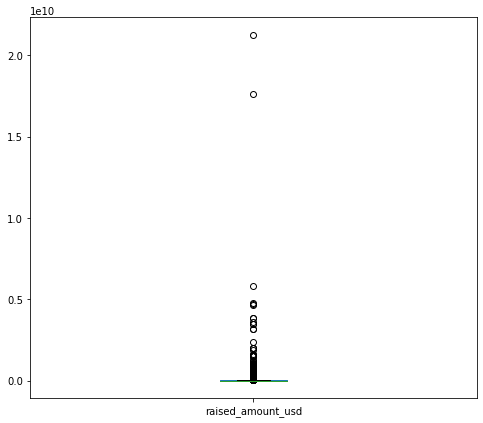

In [27]:
plt.figure(figsize =[8,7])
master_frame.raised_amount_usd.plot.box()
plt.show()

Thus a lot of outliers in the investment hence median is the best representative parameter

In [28]:
master_frame_grouped2.raised_amount_usd.median().sort_values(ascending=False)

funding_round_type
secondary_market         45850000.0
private_equity           20000000.0
post_ipo_debt            19900000.0
post_ipo_equity          12262852.5
venture                   5000000.0
undisclosed               1100000.0
debt_financing            1096653.0
angel                      414906.0
convertible_note           300000.0
seed                       300000.0
grant                      225000.0
product_crowdfunding       211500.0
equity_crowdfunding         85000.0
non_equity_assistance       60000.0
Name: raised_amount_usd, dtype: float64

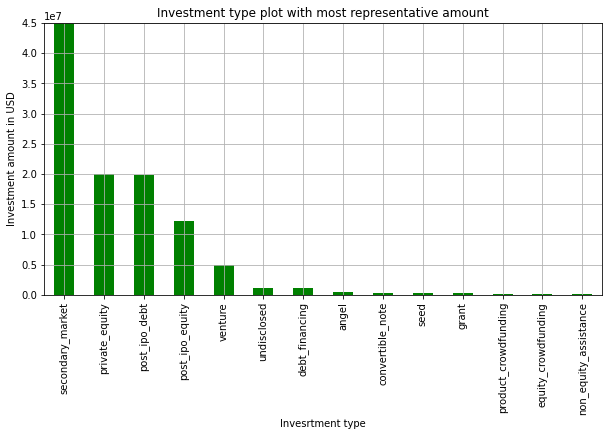

In [29]:
plt.figure(figsize=(10, 5))
master_frame_grouped2.raised_amount_usd.median().sort_values(
    ascending=False).plot.bar(color='g', grid=True)
plt.xlabel('Invesrtment type')
plt.ylabel('Investment amount in USD')
plt.title('Investment type plot with most representative amount', fontsize=12)
plt.ylim(0, 4.5e7)
plt.show()

In [30]:
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21094
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

venture = 5000000.0

angel = 414906.0

seed = 300000.0

private equity = 20000000.0

Angel & seed are less and private equity is more than Spark fund's investment amount(USD 5M - 15M) respectively. Post ipo equity and venture are in the bracket but Venture  investment type is most frequent thus it is the most suitable for Spark fund.

FT = Venture

#### Grouping top 9 countries who have received highest total investment where FT = Venture

In [31]:
master_frame.country_code.value_counts()

USA    61691
GBR     4990
CAN     2598
CHN     1911
IND     1630
       ...  
SYC        1
BRB        1
SEN        1
UZB        1
PRY        1
Name: country_code, Length: 134, dtype: int64

In [32]:
top9 = master_frame[master_frame.funding_round_type == 'venture']
top9.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0


Top english speaking countries according to population  % = US, India, Pakistan, Phillipines, Nigeria, UK

 ISO Code = ['USA', 'IND', 'PAK', 'PHL', 'NGA', 'GBR']

Site: https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language

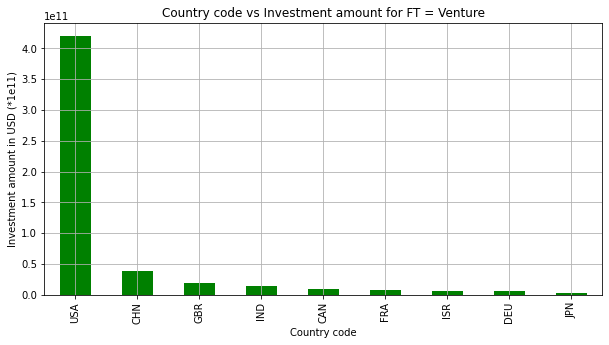

In [33]:
top9_grouped = top9.groupby('country_code')
plt.figure(figsize=(10, 5))
top9_grouped.raised_amount_usd.sum().sort_values(ascending = False)[0:9].plot.bar(color = 'g', grid = True)
plt.xlabel('Country code')
plt.ylabel('Investment amount in USD (*1e11)')
plt.title('Country code vs Investment amount for FT = Venture', fontsize = 12)
plt.show()

Thus top 3 english country with highest investment amount are:
    1. USA
    2. GBR
    3. IND

##  Sectors type analysis

In [34]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [35]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

#### Delete the row with no category list information

In [36]:
mapping = mapping[~(mapping.category_list.isnull())]

In [37]:
mapping = mapping.drop('Blanks', axis = 1)

In [38]:
'''Function to extract the main sector from the category list of master frame'''

def GetMainSector(CategoryMaster):
    MainSector = ''
    #Split the category names and keep only first sector name
    CategoryMaster = CategoryMaster.split('|')[0] 

    RowIndex = 0
    # Looping through the mapping category list
    for CategoryMapping in mapping.category_list.values: 
        #When mapping category is equal to master frame catergory
        if CategoryMapping == CategoryMaster: 

            ColIndex = 0
             #Looping through the different row of each entries
            for SectorValue in mapping.iloc[RowIndex, 1:].values: 
                if SectorValue == 1:
                    #Extracts the column name which indicates its linkage with a specific 8 main sectors
                    MainSector = str(mapping.columns[1:][ColIndex]).strip()
                    if  MainSector == "":
                        MainSector = np.nan

                ColIndex += 1
        RowIndex += 1
    return MainSector

In [39]:
'''Segregation of the primary and main sector from the mapping dataframe and master dataframe'''

master_frame['primary_sector'] = master_frame.category_list.apply(
    lambda x: x.split('|')[0])
master_frame['main_sector'] = master_frame.category_list.apply(
    lambda x: GetMainSector(x))

In [40]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,Application Platforms,"News, Search and Messaging"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web,"News, Search and Messaging"
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,Games,Entertainment
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Biotechnology,Cleantech / Semiconductors


In [41]:
master_frame.main_sector.value_counts()

Others                                     20111
Social, Finance, Analytics, Advertising    14985
Cleantech / Semiconductors                 14464
News, Search and Messaging                 12326
Health                                      6765
                                            6401
Entertainment                               5986
Manufacturing                               5696
Automotive & Sports                         1794
Name: main_sector, dtype: int64

### Prior configurations

In [42]:
'''Spark Funds wants to invest between 5 to 15 million USD'''
LowCap = 5000000
HighCap = 15000000

'''Venture investment type is the most suitable '''
RoundType = 'venture' #FT

'''top 3 english country with highest investment amount'''
CountryCode = ['USA', 'GBR', 'IND']

## USA

In [43]:

D1 = master_frame[(master_frame.raised_amount_usd >= LowCap) & 
                                (master_frame.raised_amount_usd <= HighCap)&
                                (master_frame.funding_round_type == RoundType)&
                                (master_frame.country_code == CountryCode[0])
                                ]

####  Total number of investments in USA

In [44]:
D1.country_code.value_counts()

USA    12064
Name: country_code, dtype: int64

#### Total amount of investment (USD)

In [45]:
D1.raised_amount_usd.sum()

107766584223.0

#### Number of investments in top 3 sector

In [46]:
D1.main_sector.value_counts().sort_values(ascending = False)[0:3]

Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
Name: main_sector, dtype: int64

So top 3 sectors in USA are :

    1. Others            
    
    2. Cleantech / Semiconductors
    
    3. Social, Finance, Analytics, Advertising

#### For the top sector count-wise,  company received the highest investment

In [47]:
D1[D1.main_sector == 'Others'].sort_values(by='raised_amount_usd',
                                           ascending=False).head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
23305,/organization/convio,Convio,http://www.convio.com,Software,acquired,USA,TX,Austin,Austin,01-01-1999,/funding-round/86649425a2457a013de7dafbd65225c2,venture,D,07-07-2004,15000000.0,Software,Others
9213,/organization/avamar-technologies,Avamar Technologies,NaN,Software,acquired,USA,CA,Anaheim,Irvine,01-01-1999,/funding-round/077e03edbda52d87ec2bf218b47a1c48,venture,NaN,22-09-2004,15000000.0,Software,Others
32650,/organization/equallogic,Equallogic,http://www.equallogic.com,Enterprise Software,acquired,USA,NH,"Manchester, New Hampshire",Nashua,01-01-1984,/funding-round/c725fa458b51eaa381fcf05870260abb,venture,B,26-03-2003,15000000.0,Enterprise Software,Others
86351,/organization/schoology,Schoology,http://www.schoology.com,Education|Software|Systems,operating,USA,NY,New York City,New York,01-05-2009,/funding-round/67303adefefefe5e5e572ec1ed199d67,venture,C,24-06-2014,15000000.0,Education,Others
85994,/organization/sauce-labs,Sauce Labs,http://saucelabs.com,Enterprise Software|SaaS|Software|Web Development,operating,USA,CA,SF Bay Area,San Francisco,01-08-2008,/funding-round/36b89f086b623a00d91399680233db92,venture,D,05-02-2015,15000000.0,Enterprise Software,Others


#### For the second-best sector count-wise   company received the highest investment

In [48]:
D1[D1.main_sector == 'Cleantech / Semiconductors'].sort_values(
    by='raised_amount_usd', ascending=False).head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
77984,/organization/prestwick-pharmaceuticals-inc,"Prestwick Pharmaceuticals, Inc.",NaN,Bio-Pharm|Biotechnology|Pharmaceuticals,operating,USA,DC,"Washington, D.C.",Washington,NaN,/funding-round/87d080c3134141ce6dc7beb49c9a6550,venture,A,19-06-2003,15000000.0,Bio-Pharm,Cleantech / Semiconductors
16949,/organization/cara-therapeutics,Cara Therapeutics,http://www.caratherapeutics.com,Biotechnology|Health Care,ipo,USA,CT,Hartford,Shelton,NaN,/funding-round/55507f796c1c2519f5c721d8657e7997,venture,D,21-07-2010,15000000.0,Biotechnology,Cleantech / Semiconductors
17062,/organization/cardiac-dimensions,Cardiac Dimensions,http://www.cardiacdimensions.com,Biotechnology|Health Care|Medical Devices,operating,USA,WA,Seattle,Kirkland,01-01-2001,/funding-round/09a7b10f9ff9cbcbffeedf36166d6be8,venture,NaN,17-03-2004,15000000.0,Biotechnology,Cleantech / Semiconductors
7216,/organization/aratana-therapeutics,Aratana Therapeutics,http://www.aratanatherapeutics.com,Biotechnology|Health Care,ipo,USA,KS,Kansas City,Kansas City,01-01-2010,/funding-round/2b606a5877b0042896e24ec978a38578,venture,B,07-12-2011,15000000.0,Biotechnology,Cleantech / Semiconductors
97991,/organization/taris-biomedical,TARIS Biomedical,http://www.tarisbiomedical.com,Biotechnology,operating,USA,MA,Boston,Lexington,01-01-2008,/funding-round/f047a23d49a911cf222185cc32d0fce8,venture,A,25-06-2009,15000000.0,Biotechnology,Cleantech / Semiconductors


## GBR

In [49]:

D2 = master_frame[(master_frame.raised_amount_usd >= LowCap) & 
                                (master_frame.raised_amount_usd <= HighCap)&
                                (master_frame.funding_round_type == RoundType)&
                                (master_frame.country_code == CountryCode[1])
                                ]

####  Total number of investments in GBR

In [50]:
D2.country_code.value_counts()

GBR    621
Name: country_code, dtype: int64

#### Total amount of investment (USD)

In [51]:
D2.raised_amount_usd.sum()

5379078691.0

#### Number of investments in top 3 sector

In [52]:
D2.main_sector.value_counts()[0:3]

Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
Name: main_sector, dtype: int64

So top 3 sectors in GBR are :

    1. Others            
    
    2. Cleantech / Semiconductors
    
    3. Social, Finance, Analytics, Advertising

#### For the top sector count-wise,  company received the highest investment

In [53]:
D2[D2.main_sector == 'Others'].sort_values(by='raised_amount_usd',
                                           ascending=False).head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
102680,/organization/tribold,Tribold,http://www.tribold.com,Software,acquired,GBR,H9,London,London,01-01-2003,/funding-round/36c8164caf2a5283a766e2a85b9d663c,venture,B,22-03-2007,15000000.0,Software,Others
68634,/organization/notonthehighstreet,Notonthehighstreet,http://www.notonthehighstreet.com,E-Commerce,operating,GBR,L1,London,Richmond,04-04-2006,/funding-round/1699ed5949d4d06bce01be9da7d9863f,venture,D,21-05-2012,15000000.0,E-Commerce,Others
32364,/organization/environmentiq,EnvironmentIQ,NaN,Software,operating,GBR,C3,London,Cambridge,01-01-1988,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,A,06-03-2006,15000000.0,Software,Others
49818,/organization/ip-access,ip.access,http://www.ipaccess.com,Software,operating,GBR,C6,Camborne,Camborne,01-01-2000,/funding-round/4321163564fddf7a26b7235d7c791941,venture,NaN,12-12-2011,15000000.0,Software,Others
9921,/organization/azure-solutions,Azure Solutions,http://www.azuresolutions.com,Software,acquired,GBR,H9,London,London,NaN,/funding-round/adb99f479490e33281ab358ba9da2b29,venture,NaN,16-06-2005,15000000.0,Software,Others


#### For the second-best sector count-wise   company received the highest investment

In [54]:
D2[D2.main_sector == 'Cleantech / Semiconductors'].sort_values(
    by='raised_amount_usd', ascending=False).head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
5575,/organization/anadigm,Anadigm,http://www.anadigm.com/,Semiconductors|Technology,closed,GBR,Z7,GBR - Other,Crewe,NaN,/funding-round/d66a723ef94efb39e450f62b6df312c4,venture,C,02-10-2003,15000000.0,Semiconductors,Cleantech / Semiconductors
31105,/organization/elixent,Elixent,https://www.elixent.com,Semiconductors,operating,GBR,B7,Bristol,Bristol,01-01-2000,/funding-round/11039f250826f795bfb1939629708907,venture,C,06-04-2005,15000000.0,Semiconductors,Cleantech / Semiconductors
70785,/organization/onyvax,Onyvax,http://www.onyvax.com,Biotechnology,operating,GBR,M3,Bradford,Bradford,NaN,/funding-round/bdf9dcf603552c6bab9cb9812ec5c099,venture,C,08-05-2006,14906222.0,Biotechnology,Cleantech / Semiconductors
55029,/organization/lectus-therapeutics,Lectus Therapeutics,http://www.lectustherapeutics.com,Biotechnology,closed,GBR,C3,London,Cambridge,NaN,/funding-round/4a46b9c5c0307166509f215e7efa692c,venture,A,13-02-2006,14257949.0,Biotechnology,Cleantech / Semiconductors
112268,/organization/xmos,XMOS,http://www.xmos.com,Semiconductors,operating,GBR,B7,Bristol,Bristol,01-01-2005,/funding-round/41c43ec60b5f81aa53fd1c9104e5b3c4,venture,C,03-12-2013,14000000.0,Semiconductors,Cleantech / Semiconductors


## IND

In [55]:

D3 = master_frame[(master_frame.raised_amount_usd >= LowCap) & 
                                (master_frame.raised_amount_usd <= HighCap)&
                                (master_frame.funding_round_type == RoundType)&
                                (master_frame.country_code == CountryCode[2])
                                ]

####  Total number of investments in IND

In [56]:
D3.country_code.value_counts()

IND    328
Name: country_code, dtype: int64

#### Total amount of investment (USD)

In [57]:
D3.raised_amount_usd.sum()

2949543602.0

#### Number of investments in top 3 sector

In [58]:
D3.main_sector.value_counts()[0:3]

Others                        109
News, Search and Messaging     52
Entertainment                  33
Name: main_sector, dtype: int64

So top 3 sectors in IND are :

    1. Others            
    
    2. News, Search and Messaging
    
    3. Entertainment                  

#### For the top sector count-wise,  company received the highest investment

In [59]:
D3[D3.main_sector == 'Others'].sort_values(by='raised_amount_usd',
                                           ascending=False).head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
56018,/organization/limeroad,LimeRoad,http://www.limeroad.com,E-Commerce|Social Media,operating,IND,10,New Delhi,Gurgaon,01-01-2012,/funding-round/8fb89dd64b186869e4fc63d83366eb12,venture,B,05-05-2014,15000000.0,E-Commerce,Others
20273,/organization/classteacher-learning-systems,Classteacher Learning Systems,http://www.classteacher.com,EdTech|Education,operating,IND,10,New Delhi,Gurgaon,01-01-1999,/funding-round/8be54e916f26b7702504530e6719305f,venture,NaN,27-06-2011,15000000.0,EdTech,Others
108740,/organization/voylla-retail-pvt-ltd,Voylla Retail Pvt. Ltd.,http://www.voylla.com,E-Commerce,operating,IND,19,Bangalore,Bangalore,01-05-2012,/funding-round/e75b35919cefc102295d2be82651c6a2,venture,B,05-10-2015,15000000.0,E-Commerce,Others
98504,/organization/tejas-networks-india,Tejas Networks India,http://www.tejasnetworks.com,Web Hosting,operating,IND,19,Bangalore,Bangalore,01-01-2000,/funding-round/ca35a0fd045367f9b501a9a433e2c907,venture,C,06-01-2005,15000000.0,Web Hosting,Others
84698,/organization/roposo,Roposo,http://www.roposo.com/,E-Commerce|Fashion,operating,IND,10,New Delhi,Gurgaon,01-01-2012,/funding-round/0f647fc9ce894a49ec19697b6ab4deab,venture,B,17-08-2015,15000000.0,E-Commerce,Others


#### For the second-best sector count-wise   company received the highest investment

In [60]:
D3[D3.main_sector == 'News, Search and Messaging'].sort_values(
    by='raised_amount_usd', ascending=False).head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
62904,/organization/mobile2win-india,Mobile2Win India,http://www.mobile2win.com,Mobile,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/50396c66ef239f1d5afea76ca98a76c4,venture,NaN,13-11-2006,15000000.0,Mobile,"News, Search and Messaging"
44217,/organization/hike,hike,http://get.hike.in,Messaging|Mobile,operating,IND,7,New Delhi,New Delhi,12-12-2012,/funding-round/8555dec0ba4fd695a52f9d42f7f1b3a6,venture,B,31-03-2014,14000000.0,Messaging,"News, Search and Messaging"
46680,/organization/imimobile,IMImobile,http://openhouse.imimobile.com,Mobile,ipo,IND,2,Hyderabad,Hyderabad,01-01-1999,/funding-round/143caeae3cfc9803f96104c95d0ca17b,venture,NaN,13-11-2009,13000000.0,Mobile,"News, Search and Messaging"
91308,/organization/sms-gupshup,SMS GupShup,http://www.smsgupshup.com,Mobile,operating,IND,16,Mumbai,Mumbai,01-06-1994,/funding-round/9522a14d83fcad63bb5e3ab067180a9c,venture,NaN,20-01-2010,12000000.0,Mobile,"News, Search and Messaging"
42474,/organization/gupshup-technology-india-pvt-ltd,GupShup,http://gupshup.me,Mobile,operating,IND,16,Mumbai,Mumbai,01-06-2004,/funding-round/a7ef11d7ccf8a17f6a3e632719eb2fd0,venture,D,02-03-2010,12000000.0,Mobile,"News, Search and Messaging"


#### Plot showing the number of investments in the top 3 sectors of the top 3 countries

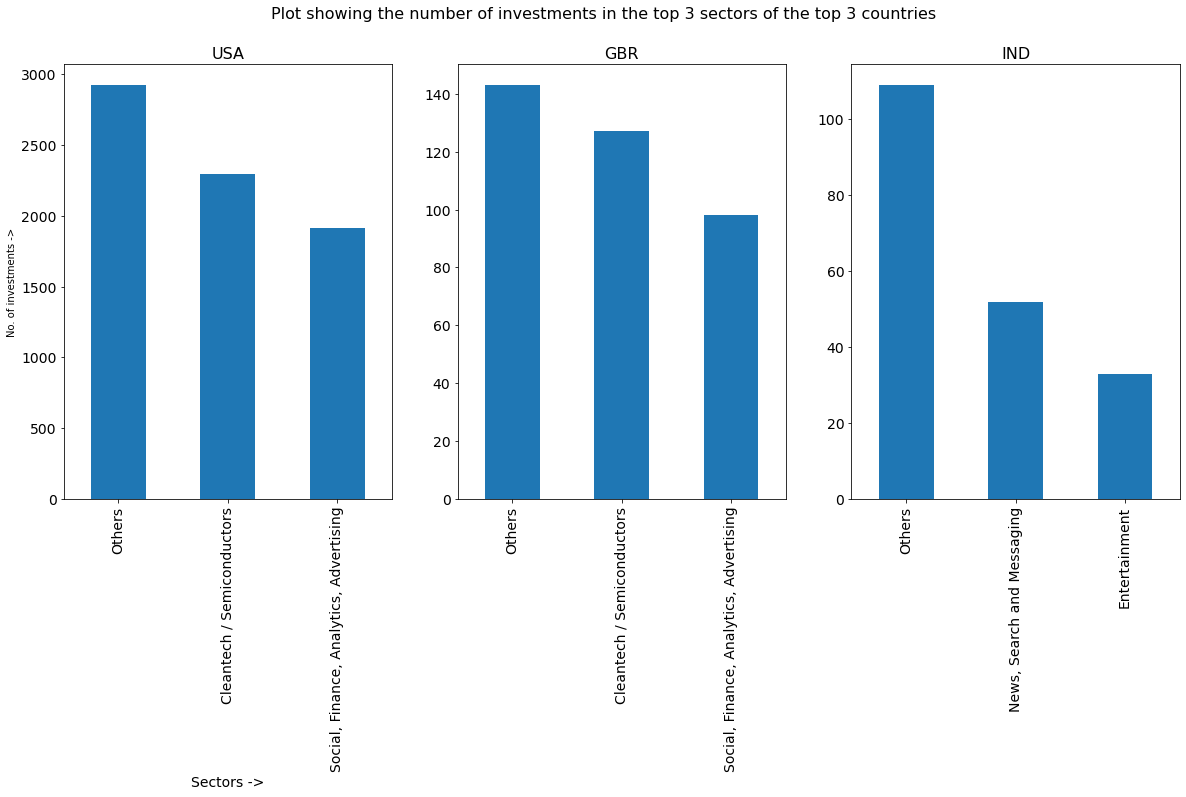

In [61]:
plt.figure(figsize=(20, 8))
plt.suptitle('Plot showing the number of investments in the top 3 sectors of the top 3 countries', fontsize = 16)

plt.subplot(1,3,1)
D1.main_sector.value_counts()[0:3].plot.bar()
plt.xlabel('Sectors ->', fontsize = 14)
plt.ylabel('No. of investments ->', )
plt.xticks( fontsize = 14)
plt.yticks( fontsize = 14)
plt.title('USA', fontsize = 16)

plt.subplot(1,3,2)
D2.main_sector.value_counts()[0:3].plot.bar()
plt.xticks( fontsize = 14)
plt.yticks( fontsize = 14)
plt.title('GBR', fontsize = 16)

plt.subplot(1,3,3)
D3.main_sector.value_counts()[0:3].plot.bar()
plt.xticks( fontsize = 14)
plt.yticks( fontsize = 14)
plt.title('IND', fontsize = 16)

plt.show()
